In [1]:
from google.colab import files
uploadedy = files.upload()

uploadedx = files.upload()
#number of receiverd particle
uploadedy1 = files.upload()
#data label
uploadedx1 = files.upload()

Saving ri.csv to ri.csv


Saving tx.csv to tx.csv


Saving riw.csv to riw.csv


Saving txw.csv to txw.csv


In [2]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

import io

In [3]:
#for the training 
datasetx = pd.read_csv(io.BytesIO(uploadedx['tx.csv']), delimiter=',')
datasety = pd.read_csv(io.BytesIO(uploadedy['ri.csv']), delimiter=',')

#for testing
datasetx1 = pd.read_csv(io.BytesIO(uploadedx1['txw.csv']), delimiter=',')
datasety1 = pd.read_csv(io.BytesIO(uploadedy1['riw.csv']), delimiter=',')

X = datasety.iloc[:, 0:1].values
y = datasetx.iloc[:, 0:1].values

ri = datasety1.iloc[:, 0:1].values
tx = datasetx1.iloc[:, 0:1].values

In [5]:

np.reshape(X, (-1,1))
np.reshape(y, (-1,1))


print(X.shape)

(3000, 1)


In [7]:
print(X)

[[   2]
 [   3]
 [   6]
 ...
 [6642]
 [6607]
 [2362]]


In [24]:
# create the model
#embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(X.max()+500, 1, input_length=1))
model.add(LSTM(1000))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X, y,validation_split=0.33, epochs=50, batch_size=1000,verbose=1)

# Final evaluation of the model
scores = model.evaluate(X, y, verbose=0)
predict = model.predict(X, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1, 1)              7323      
_________________________________________________________________
lstm_6 (LSTM)                (None, 1000)              4008000   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 4,016,324
Trainable params: 4,016,324
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
3/3 [==============================] - 1s 333ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.5086
Epoch 2/50
3/3 [==============================] - 1s 216ms/step - loss: 0.6930 - accuracy: 0.5107 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 3/50
3/3 [==============================] - 1s 217ms/step - loss: 0.6931 - accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


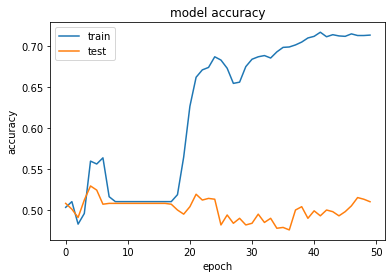

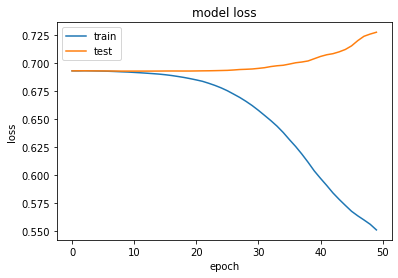

In [25]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('snip2')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('snip1')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

51
4/4 [==============================] - 0s 6ms/step - loss: 1.6905 - accuracy: 0.0000e+00
At SNR = -5
accuracy: 0.00%
4/4 [==============================] - 0s 7ms/step - loss: 1.6944 - accuracy: 0.0000e+00
At SNR = -4
accuracy: 0.00%
4/4 [==============================] - 0s 6ms/step - loss: 1.6922 - accuracy: 0.0000e+00
At SNR = -3
accuracy: 0.00%
4/4 [==============================] - 0s 6ms/step - loss: 1.6555 - accuracy: 0.0000e+00
At SNR = -2
accuracy: 0.00%
4/4 [==============================] - 0s 6ms/step - loss: 1.6633 - accuracy: 0.0000e+00
At SNR = -1
accuracy: 0.00%
4/4 [==============================] - 0s 6ms/step - loss: 1.6905 - accuracy: 0.0000e+00
At SNR = 0
accuracy: 0.00%
4/4 [==============================] - 0s 6ms/step - loss: 1.6590 - accuracy: 0.0000e+00
At SNR = 1
accuracy: 0.00%
4/4 [==============================] - 0s 6ms/step - loss: 1.6257 - accuracy: 0.0000e+00
At SNR = 2
accuracy: 0.00%
4/4 [==============================] - 0s 6ms/step - loss: 1.645

No handles with labels found to put in legend.


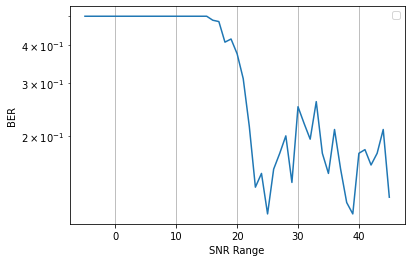

In [26]:
pd_FM = {}
idx=0
X_FM_lb=[]
for snr in range(-5, 46, 1):
  X_FM_lb.append(ri[idx:idx+100]) # Here we are using difference of 100
  idx=idx+100

print(len(X_FM_lb))


for snr in range(-5, 46, 1):
  y_snr = np.ones((X_FM_lb[snr].shape[0], 1))
  scores = model.evaluate(X_FM_lb[snr+5], y_snr)
  print("At SNR = " + str(snr) + "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  pd_FM[snr] =(1- scores[1])/2
  
plt.plot(range(-5, 46, 1), list(pd_FM.values())) #setting the range of the BER


plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('BER')
plt.grid()
plt.legend(loc='upper right',ncol = 1)
plt.savefig('snip')
plt.show()